## Demonstration of Polynomial Regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

### Using straight line function to fit non-linear data

In [20]:
#function for Zscore normalization
def zscore_norm(df):
    mu = np.mean(df)
    sd = np.std(df)
    df2 = df-mu
    df3 = df2/sd
    
    return df3, mu, sd

In [21]:
#function to compute cost using straight line model (y = mx + c)
def compute_cost(xtrain, ytrain, w, b):
    """
    Compute least-squared error cost for straight line function
    """
    m = xtrain.shape[0]
    cost = 0.0
    for i in range(m):
        fx = xtrain[i]*w + b
        err = fx - ytrain[i]
        cost = cost + err**2
    cost = cost/(2*m)
    return cost

In [22]:
#function to compute gradient of cost w.r.t w and b
def compute_gradient(xtrain, ytrain, w, b):
    """
    Compute gradient of Cost w.r.t w and b for straight line function
    """
    m = xtrain.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        fx = xtrain[i]*w + b
        err = fx - ytrain[i]
        dj_dw = dj_dw + (err*xtrain[i])
        dj_db = dj_db + err
    #average
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [23]:
#function to implement gradient descent
def gradient_descent(xtrain, ytrain, w, b, alpha, iters, compute_cost, compute_gradient):
    """
    Run gradient descent for straight line function
    """
    w_in, b_in = w, b
    J_history = []; p_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(xtrain, ytrain, w, b)
        
        #simultaneous updation of parameters
        w_in = w_in - alpha*dj_dw
        b_in = b_in - alpha*dj_db
        
        #store cost and parameters history
        if i < 100000:
            J_history.append(compute_cost(xtrain, ytrain, w_in, b_in))
            p_history.append((w_in,b_in))
        
        #printing cost at some intervals
        if i%math.ceil(iters/10) == 0:
            print(f"Iteration: {i}, Cost: {J_history[-1]}")
        
    return J_history, p_history, w_in, b_in

In [24]:
#dataset
#20 random numbers between 0 to 50
x = np.arange(0,51,1)
x = x.reshape(-1,1)
y = 1 + x**2

for i in range(len(x)):
    print(f"x{i}: {x[i]},\t y{i}: {y[i]}")

x0: [0],	 y0: [1]
x1: [1],	 y1: [2]
x2: [2],	 y2: [5]
x3: [3],	 y3: [10]
x4: [4],	 y4: [17]
x5: [5],	 y5: [26]
x6: [6],	 y6: [37]
x7: [7],	 y7: [50]
x8: [8],	 y8: [65]
x9: [9],	 y9: [82]
x10: [10],	 y10: [101]
x11: [11],	 y11: [122]
x12: [12],	 y12: [145]
x13: [13],	 y13: [170]
x14: [14],	 y14: [197]
x15: [15],	 y15: [226]
x16: [16],	 y16: [257]
x17: [17],	 y17: [290]
x18: [18],	 y18: [325]
x19: [19],	 y19: [362]
x20: [20],	 y20: [401]
x21: [21],	 y21: [442]
x22: [22],	 y22: [485]
x23: [23],	 y23: [530]
x24: [24],	 y24: [577]
x25: [25],	 y25: [626]
x26: [26],	 y26: [677]
x27: [27],	 y27: [730]
x28: [28],	 y28: [785]
x29: [29],	 y29: [842]
x30: [30],	 y30: [901]
x31: [31],	 y31: [962]
x32: [32],	 y32: [1025]
x33: [33],	 y33: [1090]
x34: [34],	 y34: [1157]
x35: [35],	 y35: [1226]
x36: [36],	 y36: [1297]
x37: [37],	 y37: [1370]
x38: [38],	 y38: [1445]
x39: [39],	 y39: [1522]
x40: [40],	 y40: [1601]
x41: [41],	 y41: [1682]
x42: [42],	 y42: [1765]
x43: [43],	 y43: [1850]
x44: [44],	 y44: [1

In [25]:
#Normalize the dataset
x_norm, x_mu, x_sd = zscore_norm(x)
y_norm, y_mu, y_sd = zscore_norm(y)

In [26]:
#Some initializations
alpha = 0.01
iters = 500
w, b = 0,0
#calling GD for straight line function
J_history, p_history, final_w, final_b = gradient_descent(x, y, w, b, alpha, iters,
                                                         compute_cost, compute_gradient)

Iteration: 0, Cost: [33353091.13324444]
Iteration: 50, Cost: [1.11042506e+11]
Iteration: 100, Cost: [4.36509955e+11]
Iteration: 150, Cost: [9.76435698e+11]
Iteration: 200, Cost: [1.73081974e+12]
Iteration: 250, Cost: [2.69966207e+12]
Iteration: 300, Cost: [3.8829627e+12]
Iteration: 350, Cost: [5.28072162e+12]
Iteration: 400, Cost: [6.89293884e+12]
Iteration: 450, Cost: [8.71961435e+12]


As we can see, the cost goes on increasing.  
- The purpose was to demonstrate if data points are non-linear, here, they follow a quadratic function, then straight line function does not produce a good fit for the dataset.  
- In next section, I'll tweak the linear model a bit, making it polynomial and try to re-do the training.  


In [27]:
#compute model output using trained parameters w and b
y_output = np.zeros_like(y_norm)
m = x_norm.shape[0]
for i in range(m):
    y_output[i] = x_norm[i]*final_w + final_b

In [28]:
#normalize the model output- for similar scale on plot
output_norm, output_mu, output_sd = zscore_norm(y_output)

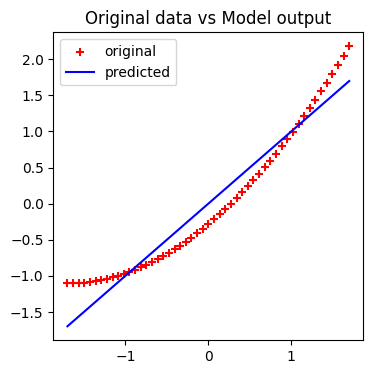

In [29]:
#plot of the original dataset vs output of linear model

#fig, ax = plt.subplots(1,2, figsize = (6,3), constrained_layout = True)
plt.figure(figsize = (4,4))
plt.scatter(x_norm, y_norm, c="red", marker='+', label = "original")
plt.plot(x_norm, output_norm, c="blue", label = "predicted")
#title of plot
plt.title('Original data vs Model output')
plt.legend()
plt.show()

The model produces a straight line which is not a good fit for the non-linear dataset.  
A polynomial expression has been used below to create a model that fits this dataset.

#### Using quadratic function as model function

In [30]:
#function to compute cost.
#here, model function is quadratic
def compute_cost_polynom(xtrain, ytrain, w, b):
    m = xtrain.shape[0]
    cost = 0.0
    for i in range(m):
        fx = np.dot(xtrain[i], w) + b
        err = fx - ytrain[i]
        cost = cost + err**2
    cost = cost/(2*m)
    return cost

In [31]:
#function to compute gradient
def compute_gradient_polynom(xtrain, ytrain, w, b):
    m = xtrain.shape[0]
    dj_dw, dj_db = 0.0, 0.0
    for i in range(m):
        fx = np.dot(xtrain[i], w) + b
        err = fx - ytrain[i]
        dj_dw = dj_dw + err*xtrain[i]
        dj_db = dj_db + err
    #average
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [32]:
#function to run gradient descent
def gradient_descent_polynom(xtrain, ytrain, w, b, alpha, iters, compute_cost_polynom, compute_gradient_polynom):
    J_history, p_history = [],[]
    w_in, b_in = w, b
    for i in range(iters):
        #print(f"Iteration: {i}")
        #compute gradient
        dj_dw, dj_db = compute_gradient_polynom(xtrain, ytrain, w_in, b_in)
        
        #simultaneous updation of parameters
        w_in = w_in - alpha*dj_dw
        b_in = b_in - alpha*dj_db
        
        #store cost and parameter history
        if i < 100000:
            J_history.append(compute_cost_polynom(xtrain, ytrain, w_in, b_in))
            p_history.append((w_in,b_in))
            
        #print cost at some intervals
        if i % math.ceil(iters/10) == 0:
            print(f"Iteration: {i}, Cost: {J_history[-1]}")
        
    return J_history, p_history, w_in, b_in

In [33]:
#Some initializations
alpha = 0.001
iters = 500
w, b = [0, 0], 0

In [34]:
#new dataset
feature1 = np.arange(0,50,1)
target_output = feature1**2 + 1
#new feature
feature2 = feature1**2
#combinig both x1 and x2 as a 2D array
x = np.vstack((feature1, feature2)).T

In [35]:
#normalize both datasets
x1_norm, x1_mu, x1_sd = zscore_norm(x)
y1_norm, y1_mu, y1_sd = zscore_norm(target_output)

In [36]:
#call gradient descent for polynomial expression
polynom_cost, polynom_parameters, polynom_w, polynom_b = gradient_descent_polynom(x1_norm, y1_norm, w, b, alpha, iters, 
                                                                                  compute_cost_polynom, 
                                                                                  compute_gradient_polynom)

Iteration: 0, Cost: 0.49873088582243724
Iteration: 50, Cost: 0.4402032823646501
Iteration: 100, Cost: 0.39019691943798707
Iteration: 150, Cost: 0.34725807717063634
Iteration: 200, Cost: 0.31020318179410955
Iteration: 250, Cost: 0.2780666405319613
Iteration: 300, Cost: 0.25005890941634346
Iteration: 350, Cost: 0.22553277417300016
Iteration: 400, Cost: 0.20395622397775479
Iteration: 450, Cost: 0.18489061839616244


In [37]:
#check how good the model is
poly_output = np.zeros_like(y1_norm)
for i in range(x1_norm.shape[0]):
    poly_output[i] = np.dot(x1_norm[i], polynom_w) + polynom_b

#normalize the output
output_mu = np.mean(poly_output, axis = 0)
output_sd = np.std(poly_output, axis = 0)
poly_output = poly_output - output_mu
poly_output = poly_output/output_sd
    

In [38]:
polynom_w

array([0.03943468, 0.39210006])

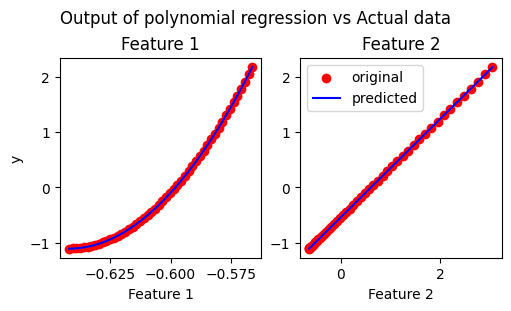

In [39]:
#plot

fig, ax = plt.subplots(1,2,constrained_layout = True, figsize = (5,3))

#subplot 1- feature 1
ax[0].scatter(x1_norm[:,0], y1_norm, c = "red", label = "original")
ax[0].plot(x1_norm[:,0], poly_output, c = "blue", label = "predicted")
ax[0].set_title('Feature 1')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('y')

#subplot 2- Feature 2
ax[1].scatter(x1_norm[:,1], y1_norm, c = "red", label = "original")
ax[1].plot(x1_norm[:,1], poly_output, c = "blue", label = "predicted")
ax[1].set_title('Feature 2')
ax[1].set_xlabel('Feature 2')

#show legend
plt.legend()
plt.suptitle("Output of polynomial regression vs Actual data")
plt.show()